In [2]:
import os
import torch
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations for the images
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# Define the model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

if('model.pth' in os.listdir()):
    model.load_state_dict(torch.load('model.pth'))
    model.eval()

# Define the loss
criterion = nn.CrossEntropyLoss()

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr=0.003)

Training the model
Epoch 1/5
Training loss: 0.36360428472762424
Epoch 2/5
Training loss: 0.34423441760766227
Epoch 3/5
Training loss: 0.3289889449090846
Epoch 4/5
Training loss: 0.31665816774436917
Epoch 5/5
Training loss: 0.30573886926017846


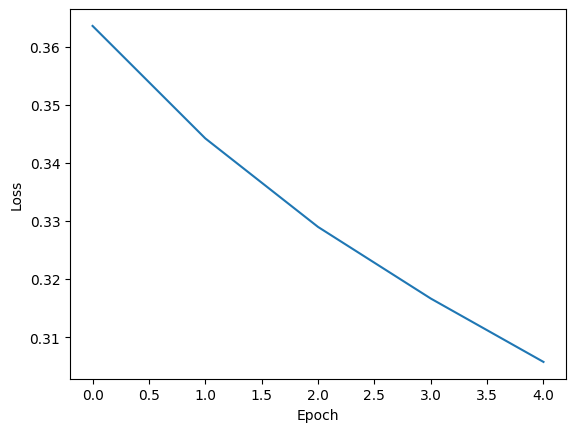

In [4]:
import matplotlib.pyplot as plt

# Training the model
epochs = 5
losses = []  # to store losses for each epoch
print('Training the model')
for e in range(epochs):
    print(f'Epoch {e+1}/{epochs}')
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        epoch_loss = running_loss/len(trainloader)
        print(f"Training loss: {epoch_loss}")
        losses.append(epoch_loss)

# Plotting the losses
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Predicted Digit = 7


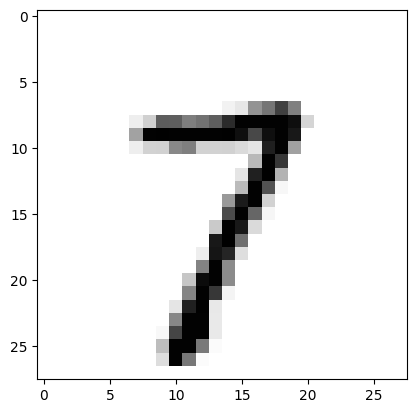

In [25]:
import numpy as np

# Get a random batch of images and labels
images, labels = next(iter(trainloader))

# Select a random image from the batch
random_index = np.random.randint(len(images))
random_image = images[random_index].view(1, 784)

# Forward pass
with torch.no_grad():
    logps = model(random_image)

# Output probability distribution
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

# Show the image
plt.imshow(random_image.view(28, 28), cmap='gray_r');

In [15]:
torch.save(model.state_dict(), 'model.pth')